In [1]:
# Import libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Configure plot size globally for consistency
plt.rcParams["figure.figsize"] = (12, 5)

### Generating Monthly Time Series Data

In [2]:
# Create a range of monthly dates starting from January 2024
our_dates = pd.date_range(start='2024-01-01', periods=20, freq='MS')

# Generate random temperatures for two types of data
our_temperatures = np.random.uniform(low=2, high=40, size=len(our_dates))
oil_temperatures = np.random.uniform(low=-3, high=10, size=len(our_dates))

# Create pandas Series for each temperature data type
temperatures_series = pd.Series(our_temperatures, index=our_dates)
oil_series = pd.Series(oil_temperatures, index=our_dates)

### Plotting the Monthly Time Series Data

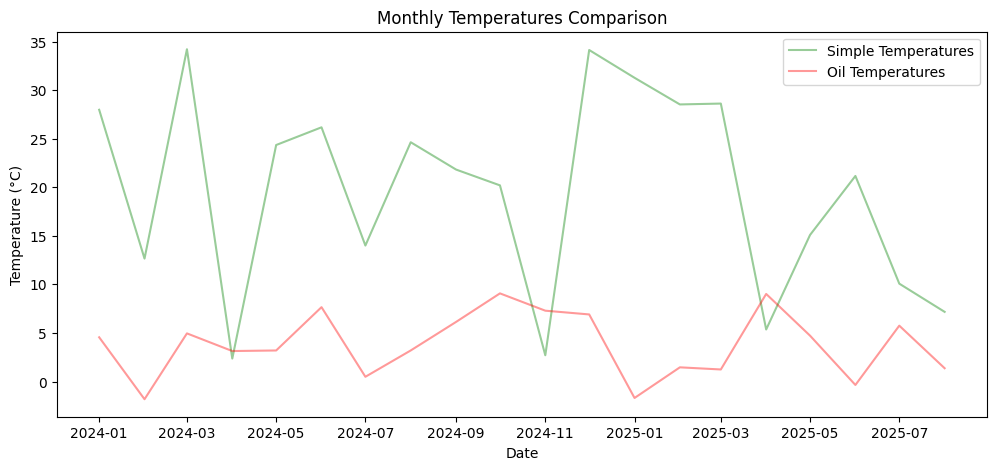

In [3]:
# Plotting the temperature series for two types of data
plt.plot(temperatures_series, color='green', alpha=0.4, label='Simple Temperatures')
plt.plot(oil_series, color='red', alpha=0.4, label='Oil Temperatures')
plt.legend()
plt.title('Monthly Temperatures Comparison')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()


### Combining Series into a DataFrame

In [4]:
# Create a DataFrame from the temperature series
temp_data = {
    'simple_temperatures': temperatures_series,
    'oil_temperatures': oil_series
}
temperatures_df = pd.DataFrame(temp_data, index=our_dates)
temperatures_df.tail()  # Display the last few rows


,simple_temperatures,oil_temperatures
2025-04-01,5.355682,9.015170
2025-05-01,15.091199,4.717804
2025-06-01,21.162863,-0.356841
2025-07-01,10.074776,5.749416
2025-08-01,7.170376,1.367278


### Selecting Time Series Data by Date

In [5]:
# Select the last 5 records using iloc
last_5_records = temperatures_df.iloc[-5:]
last_5_records

# Select records up to a specific date using loc
upto_september = temperatures_df.loc[:'2024-09-30']
upto_september


,simple_temperatures,oil_temperatures
2024-01-01,27.977522,4.553389
2024-02-01,12.655123,-1.823921
2024-03-01,34.211064,4.954074
2024-04-01,2.359207,3.136867
2024-05-01,24.348777,3.194896
2024-06-01,26.171098,7.653905
2024-07-01,13.997837,0.486616
2024-08-01,24.633096,3.197459
2024-09-01,21.821263,6.135297


### Generating Daily Time Series Data with Rolling Mean

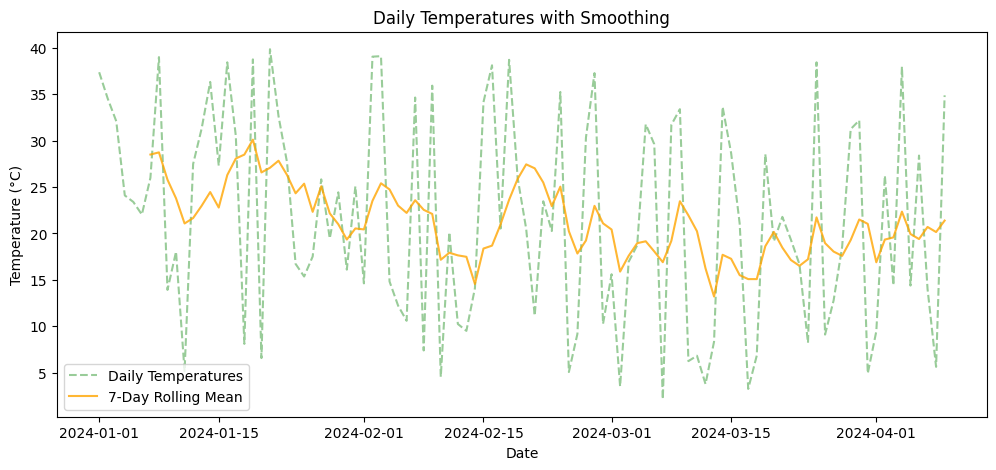

In [6]:
# Create a range of daily dates and generate temperature data for each day
daily_dates = pd.date_range(start='2024-01-01', periods=100, freq='D')
daily_temperatures = np.random.uniform(low=2, high=40, size=len(daily_dates))
temperatures_daily_series = pd.Series(daily_temperatures, index=daily_dates)

# Plotting daily temperatures with a rolling mean
plt.plot(temperatures_daily_series, color='green', alpha=0.4, label='Daily Temperatures', linestyle='--')
plt.plot(temperatures_daily_series.rolling(window=7).mean(), color='orange', alpha=0.8, label='7-Day Rolling Mean')
plt.legend()
plt.title('Daily Temperatures with Smoothing')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()


In [7]:
# Calculate daily differences to show changes in temperature day-by-day
daily_diff = temperatures_daily_series.diff(1)
daily_diff.head(10)  # Display the first 10 changes

# Subtracting shifted series from the original series
shifted_diff = temperatures_daily_series - temperatures_daily_series.shift(1)
shifted_diff.head(10)

2024-01-01          NaN
2024-01-02    -2.832406
2024-01-03    -2.438067
2024-01-04    -7.986834
2024-01-05    -0.704432
2024-01-06    -1.357141
2024-01-07     3.958032
2024-01-08    12.989340
2024-01-09   -25.052167
2024-01-10     4.110755
Freq: D, dtype: float64

In [8]:
# Calculate the correlation between the original series and a 1-day lagged version
autocorrelation = temperatures_daily_series.corr(temperatures_daily_series.shift(1))
autocorrelation


-0.007682463962751917

In [9]:
# Mean temperature for the first and second weeks
week_1_mean = temperatures_daily_series[:7].mean()
week_2_mean = temperatures_daily_series[7:14].mean()
week_1_mean, week_2_mean

(28.490612896835643, 24.452066238644985)

In [10]:
# Resample daily data to hourly frequency, using forward filling to fill in missing values
hourly_resampled = temperatures_daily_series.resample('H').mean().ffill()
hourly_resampled.head(10)  # Display the first 10 records for inspection

C:\Users\gf65\AppData\Local\Temp\ipykernel_13620\1915626730.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_resampled = temperatures_daily_series.resample('H').mean().ffill()


2024-01-01 00:00:00    37.347992
2024-01-01 01:00:00    37.347992
2024-01-01 02:00:00    37.347992
2024-01-01 03:00:00    37.347992
2024-01-01 04:00:00    37.347992
2024-01-01 05:00:00    37.347992
2024-01-01 06:00:00    37.347992
2024-01-01 07:00:00    37.347992
2024-01-01 08:00:00    37.347992
2024-01-01 09:00:00    37.347992
Freq: h, dtype: float64

### Introducing Missing Data and Checking NaNs

In [11]:
# Introduce missing values at specific indices
temperatures_daily_series.iloc[5] = np.nan  # Single NaN value
temperatures_daily_series.iloc[10:15] = np.nan  # Block of NaN values
temperatures_daily_series.iloc[30] = np.nan  # Another single NaN

# Check for NaNs
temperatures_daily_series.isna().sum()  # Total count of missing values


7

### Visualizing Interpolation and Forward Fill for Missing Data

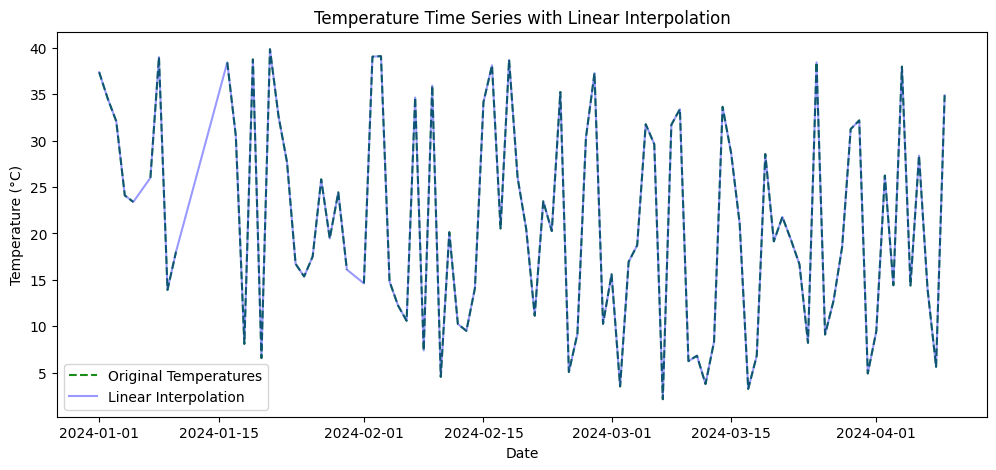

In [12]:
# Plot with gaps and interpolated values
plt.plot(temperatures_daily_series, color='green', alpha=0.9, label='Original Temperatures', linestyle='--')
plt.plot(temperatures_daily_series.interpolate(method='linear'), color='blue', alpha=0.4, label='Linear Interpolation')
plt.legend()
plt.title('Temperature Time Series with Linear Interpolation')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()


### Setting Up a Time Series with Trend, Seasonality, and Noise

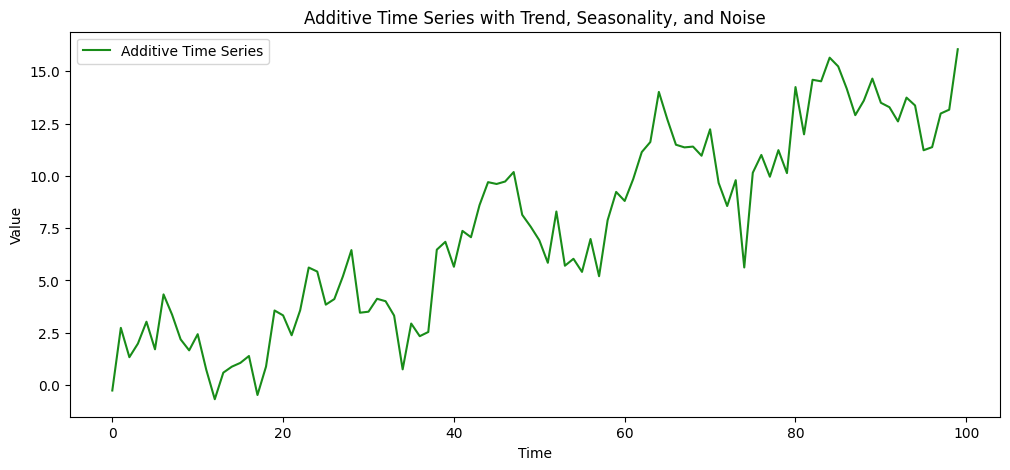

In [13]:
# Generate a time series with trend, seasonality, and noise
periods = 100
time = np.arange(periods)

# Define a linear trend
trend = 0.15 * time

# Generate seasonality with a periodicity of 20 (e.g., monthly pattern)
seasonality_period = 20
seasonality = 2 * np.sin(2 * np.pi * time / seasonality_period)

# Generate random noise
noise = np.random.normal(size=len(time))

# Additive time series (trend + seasonality + noise)
our_timeseries_add = trend + seasonality + noise

# Multiplicative time series (trend * seasonality * noise)
our_timeseries_multiplicative = trend * seasonality * noise

# Plot the additive time series
plt.figure(figsize=(12, 5))
plt.plot(our_timeseries_add, color='green', alpha=0.9, label='Additive Time Series')
plt.legend()
plt.title('Additive Time Series with Trend, Seasonality, and Noise')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


### Decomposing the Time Series

<Figure size 1200x800 with 0 Axes>

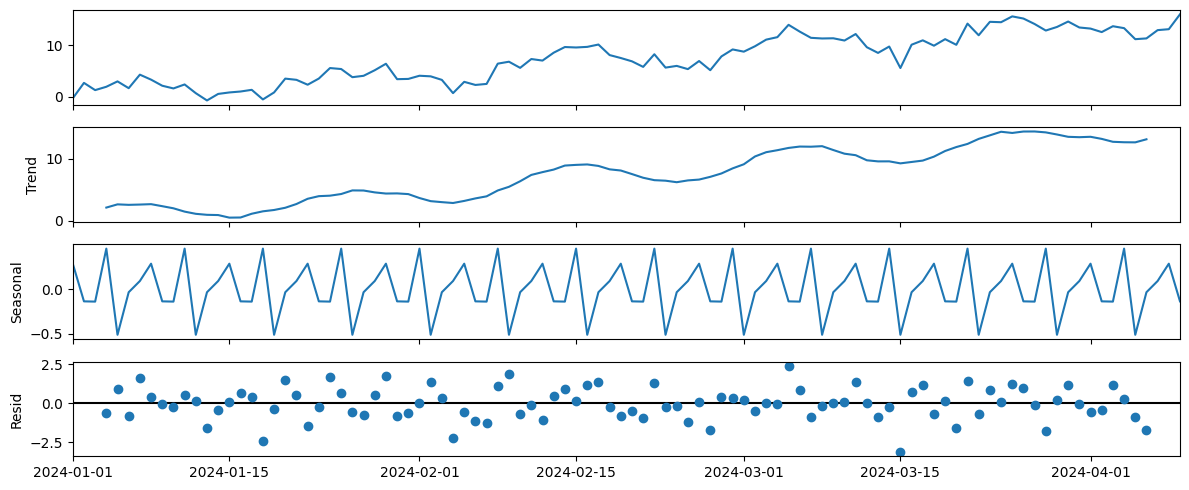

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert the time series into a pandas Series
time_series = pd.Series(our_timeseries_add, index=pd.date_range(start='2024-01-01', periods=100, freq='D'))

# Decompose the time series
decomposition = seasonal_decompose(time_series, model='additive')

# Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.tight_layout()
plt.show()


### Simple Moving Average (SMA) for Smoothing and Forecasting

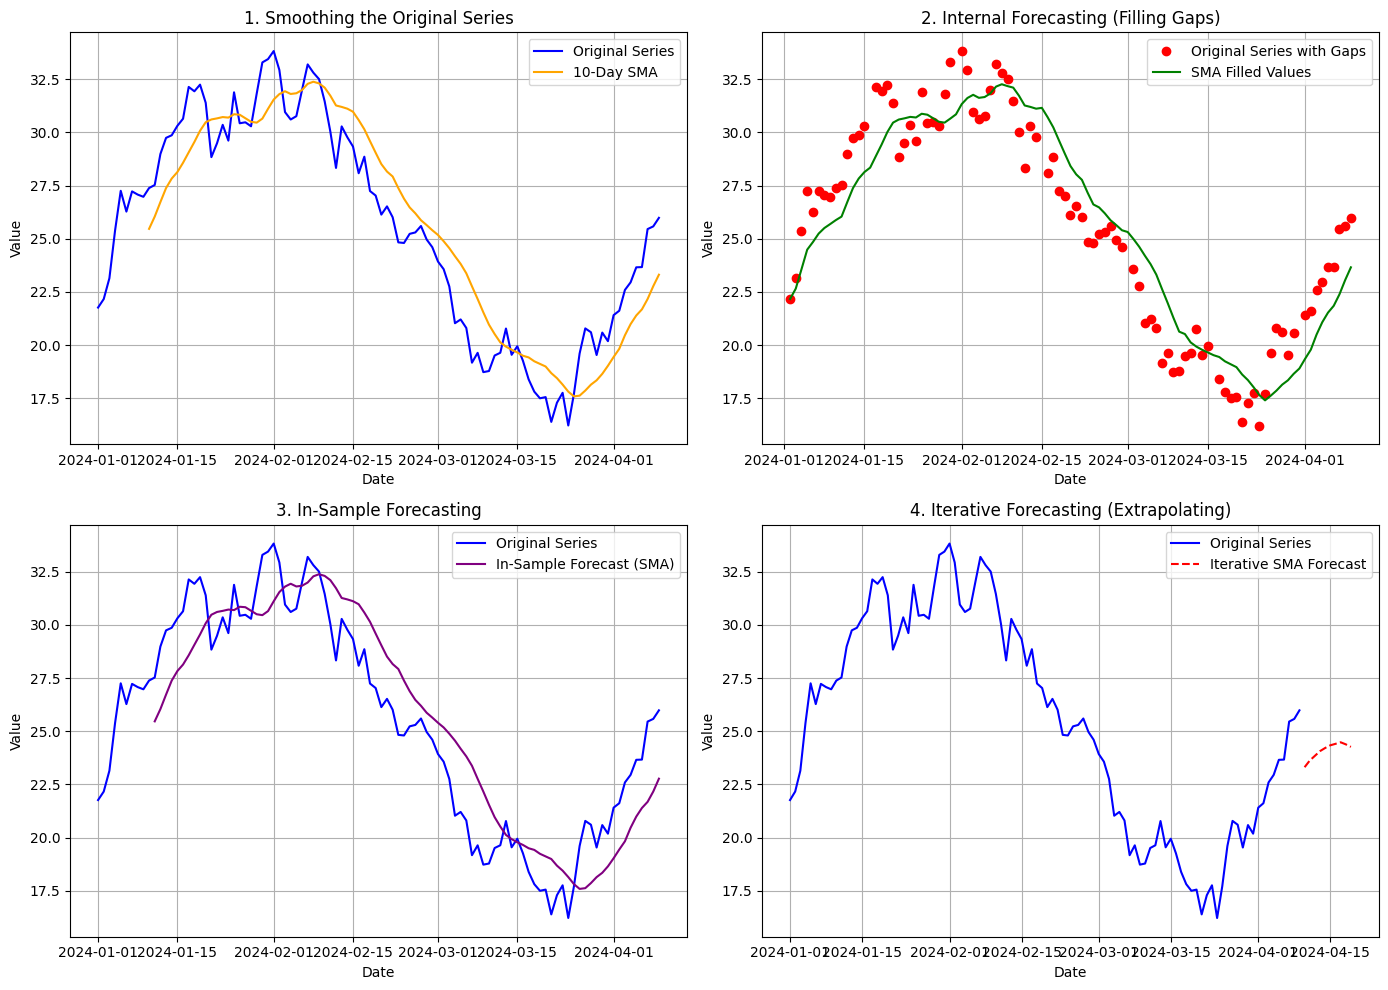

In [22]:
# Generate sample time series data
np.random.seed(0)
time_series = pd.Series(np.cumsum(np.random.randn(100)) + 20, 
                        index=pd.date_range(start='2024-01-01', periods=100, freq='D'))

# Parameters
window_size = 10
forecast_steps = 10

# 1. Smoothing the Original Series with SMA
sma_smoothed = time_series.rolling(window=window_size).mean()

# 2. Internal Forecasting (Filling Gaps)
df_with_gaps = time_series.copy().to_frame(name='Value')
df_with_gaps.iloc[::15] = np.nan  # Insert NaNs every 15 days
filled_values = df_with_gaps['Value'].rolling(window=window_size, min_periods=1).mean()

# 3. In-Sample Forecasting (Predicting Within the Original Range)
in_sample_forecast = time_series.shift(1).rolling(window=window_size).mean()

# 4. Iterative Forecasting (Extrapolating to the Future)
iterative_forecast = time_series.copy().to_frame(name='Value')
for i in range(forecast_steps):
    last_window = iterative_forecast['Value'][-window_size:]
    new_forecast_value = last_window.mean()
    next_date = iterative_forecast.index[-1] + pd.Timedelta(days=1)
    iterative_forecast.loc[next_date] = new_forecast_value

# Store results for plotting
forecasting_results = {
    'Original Series': time_series,
    'SMA Smoothed': sma_smoothed,
    'Filled Gaps (SMA)': filled_values,
    'In-Sample Forecast (SMA)': in_sample_forecast,
    'Iterative Forecast': iterative_forecast['Value'][len(time_series):]
}

# Plotting each step
plt.figure(figsize=(14, 10))

# Smoothing the Original Series
plt.subplot(2, 2, 1)
plt.plot(forecasting_results['Original Series'], label='Original Series', color='blue')
plt.plot(forecasting_results['SMA Smoothed'], label=f'{window_size}-Day SMA', color='orange')
plt.title('1. Smoothing the Original Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Internal Forecasting (Filling Gaps)
plt.subplot(2, 2, 2)
plt.plot(df_with_gaps['Value'], label='Original Series with Gaps', color='red', marker='o', linestyle='None')
plt.plot(forecasting_results['Filled Gaps (SMA)'], label='SMA Filled Values', color='green')
plt.title('2. Internal Forecasting (Filling Gaps)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()

# In-Sample Forecasting
plt.subplot(2, 2, 3)
plt.plot(forecasting_results['Original Series'], label='Original Series', color='blue')
plt.plot(forecasting_results['In-Sample Forecast (SMA)'], label='In-Sample Forecast (SMA)', color='purple')
plt.title('3. In-Sample Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Iterative Forecasting (Extrapolating into the Future)
plt.subplot(2, 2, 4)
plt.plot(forecasting_results['Original Series'], label='Original Series', color='blue')
plt.plot(forecasting_results['Iterative Forecast'], label='Iterative SMA Forecast', color='red', linestyle='--')
plt.title('4. Iterative Forecasting (Extrapolating)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### Moving Averages and Smoothing Techniques

Simple Moving Average (SMA): Smooths out short-term fluctuations by averaging over a fixed window.  
Weighted Moving Average (WMA): Assigns higher weights to more recent observations, emphasizing recent trends.   
Exponential Smoothing: Applies a decaying weight to past observations based on a smoothing factor, capturing trends more responsively.

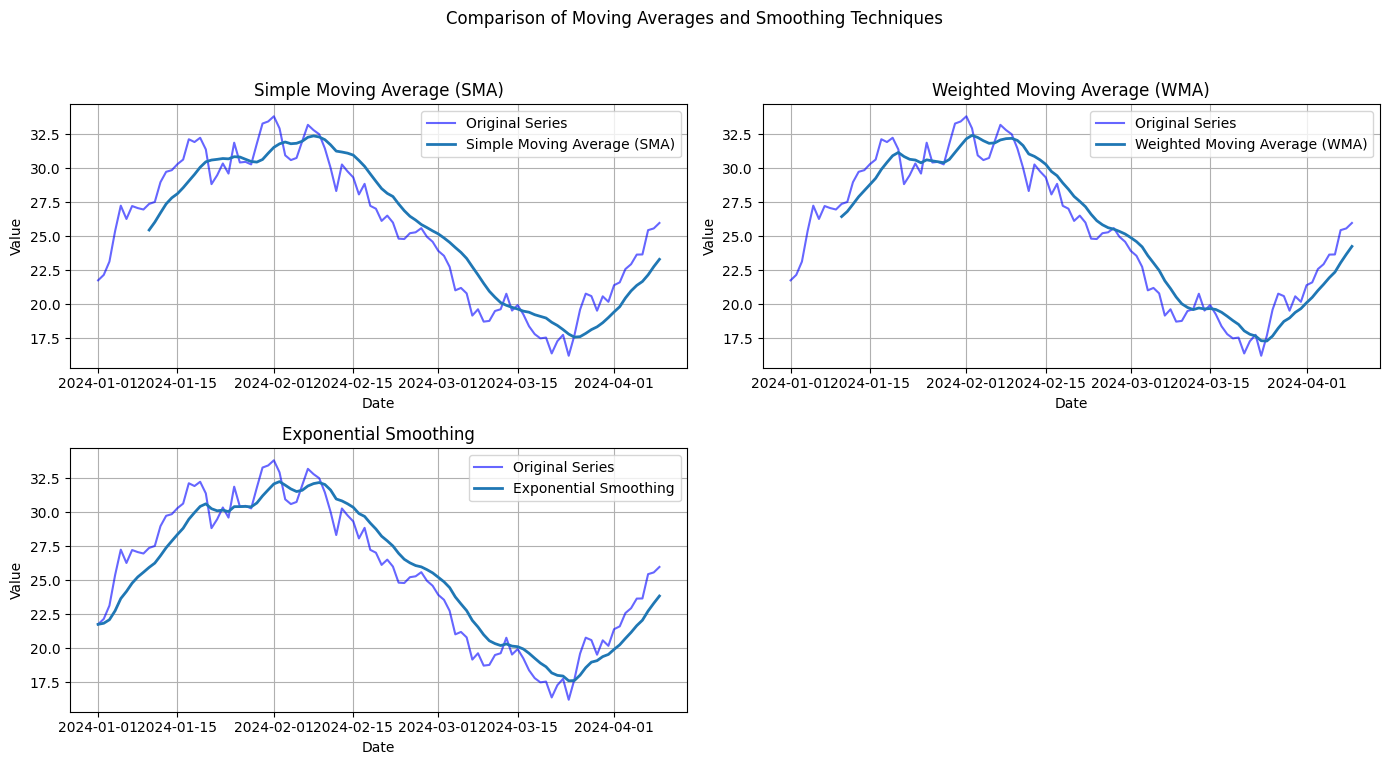

In [21]:
# Generate sample time series data
np.random.seed(0)  # For reproducibility
time_series = pd.Series(np.cumsum(np.random.randn(100)) + 20, 
                        index=pd.date_range(start='2024-01-01', periods=100, freq='D'))

# Define parameters for smoothing techniques
window_size = 10
alpha = 0.2  # Smoothing factor for Exponential Smoothing

# 1. Simple Moving Average (SMA)
sma_smoothed = time_series.rolling(window=window_size).mean()

# 2. Weighted Moving Average (WMA)
weights = np.arange(1, window_size + 1)
wma = time_series.rolling(window=window_size).apply(lambda x: np.sum(weights * x) / np.sum(weights), raw=True)

# 3. Exponential Smoothing (EWMA)
exponential_smoothing = time_series.ewm(alpha=alpha, adjust=False).mean()

# Prepare smoothing results for easier iteration and plotting
smoothing_methods = {
    'Simple Moving Average (SMA)': sma_smoothed,
    'Weighted Moving Average (WMA)': wma,
    'Exponential Smoothing': exponential_smoothing
}

# Plotting each smoothing technique
plt.figure(figsize=(14, 8))
for i, (title, smoothed_data) in enumerate(smoothing_methods.items(), start=1):
    plt.subplot(2, 2, i)
    plt.plot(time_series, label='Original Series', color='blue', alpha=0.6)
    plt.plot(smoothed_data, label=title, linewidth=2)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()

# Adjust layout
plt.suptitle('Comparison of Moving Averages and Smoothing Techniques')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Time Series Forecasting with Multiple Methods

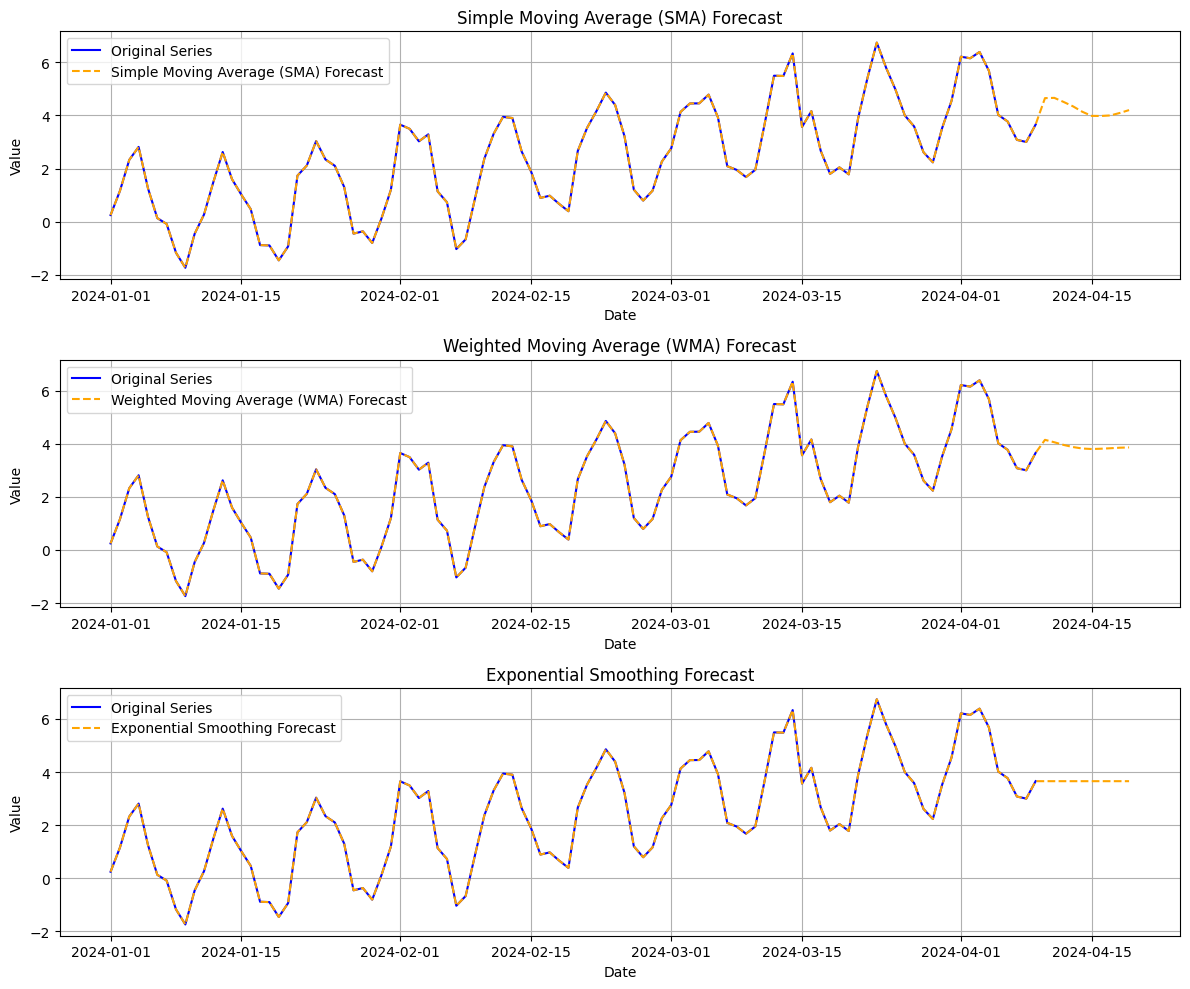

In [23]:
# Set random seed and generate synthetic time series
np.random.seed(42)
n_periods = 100
time = np.arange(n_periods)
trend = 0.05 * time
seasonality = 2 * np.sin(2 * np.pi * time / 10)
white_noise = np.random.normal(loc=0, scale=0.5, size=n_periods)
time_series = trend + seasonality + white_noise

# Create DataFrame
df = pd.DataFrame({'Value': time_series}, index=pd.date_range(start='2024-01-01', periods=n_periods))

# Forecast Parameters
window_size = 10
forecast_steps = 10
alpha = 0.2  # Smoothing factor for Exponential Smoothing
weights = np.arange(1, window_size + 1)  # For WMA

# Initialize DataFrames for forecasting methods
forecast_methods = {
    'SMA Forecast': df.copy(),
    'WMA Forecast': df.copy(),
    'Exponential Smoothing Forecast': df.copy()
}

# Forecasting Logic for each method
for i in range(forecast_steps):
    # Simple Moving Average (SMA)
    sma_last_window = forecast_methods['SMA Forecast']['Value'][-window_size:]
    sma_new_value = sma_last_window.mean()
    forecast_methods['SMA Forecast'].loc[forecast_methods['SMA Forecast'].index[-1] + pd.Timedelta(days=1)] = sma_new_value

    # Weighted Moving Average (WMA)
    wma_last_window = forecast_methods['WMA Forecast']['Value'][-window_size:]
    wma_new_value = np.sum(weights * wma_last_window) / np.sum(weights)
    forecast_methods['WMA Forecast'].loc[forecast_methods['WMA Forecast'].index[-1] + pd.Timedelta(days=1)] = wma_new_value

    # Exponential Smoothing
    exp_last_value = forecast_methods['Exponential Smoothing Forecast']['Value'].iloc[-1]
    exp_new_value = alpha * exp_last_value + (1 - alpha) * exp_last_value
    forecast_methods['Exponential Smoothing Forecast'].loc[forecast_methods['Exponential Smoothing Forecast'].index[-1] + pd.Timedelta(days=1)] = exp_new_value

# Plotting the results in a loop
plt.figure(figsize=(12, 10))
titles = [
    'Simple Moving Average (SMA) Forecast',
    'Weighted Moving Average (WMA) Forecast',
    'Exponential Smoothing Forecast'
]

for i, (method, forecast_df) in enumerate(forecast_methods.items(), start=1):
    plt.subplot(3, 1, i)
    plt.plot(df['Value'], label='Original Series', color='blue')
    plt.plot(forecast_df['Value'], label=titles[i-1], color='orange', linestyle='--')
    plt.title(titles[i-1])
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

### ARMA forecasting

C:\Users\gf65\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


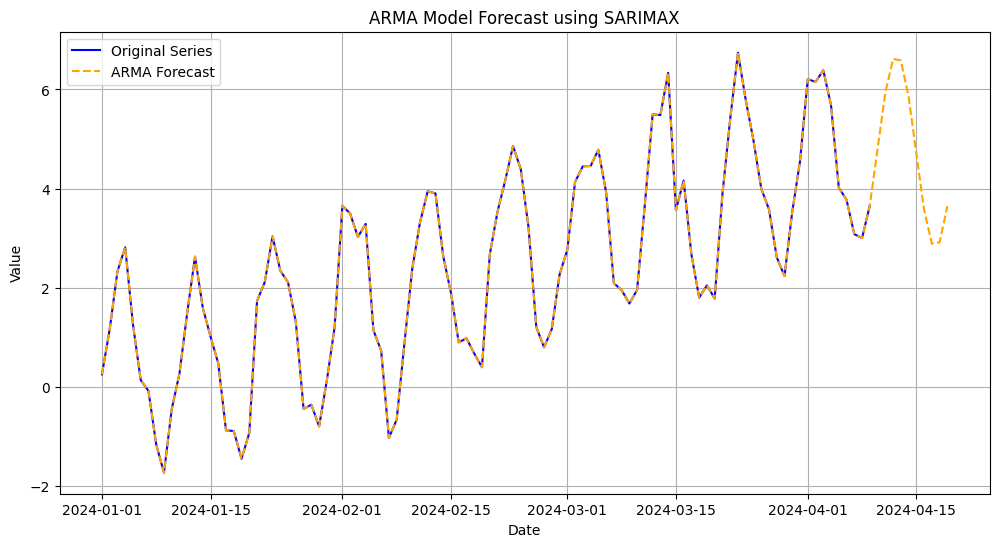

In [27]:
import statsmodels.api as sm

arma_forecast = df.copy()

# 4. ARMA Model Forecasting using SARIMAX
# Fit the SARIMAX model (order: p=2, d=0, q=2)
p = 3
d = 0  # No differencing for ARMA
q = 4
# Define and fit the ARMA model
model = sm.tsa.SARIMAX(df['Value'], order=(p, d, q))
arma_fit = model.fit(maxiter=500, disp=False)

# Forecast steps into the future
arma_forecast_values = arma_fit.forecast(steps=forecast_steps)

# Append forecasts to arma_forecast DataFrame
for i, forecast_value in enumerate(arma_forecast_values):
    next_date = arma_forecast.index[-1] + pd.Timedelta(days=1)
    arma_forecast.loc[next_date] = forecast_value



# 4. Original Series and ARMA Forecast
plt.figure(figsize=(12,6))
plt.plot(df['Value'], label='Original Series', color='blue')
plt.plot(arma_forecast, label='ARMA Forecast', color='orange', linestyle='--')
plt.title('ARMA Model Forecast using SARIMAX')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()